<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignmnet 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [30]:
import numpy as np
import tensorflow
from tensorflow import keras

In [31]:
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [32]:
# Load the data.

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [33]:
# Check the shape.

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [34]:
# Normalize the data.

X_train = tensorflow.keras.utils.normalize(X_train, axis=-1, order=2)
X_test = tensorflow.keras.utils.normalize(X_test, axis=-1, order=2)

In [35]:
# Define hyperparameters.

batch_size = 32
num_classes = 1
epochs = 1000

In [36]:
# Specify the model.

boston_model = Sequential()

# Input => Hidden Layer
# 16 represents the number of neurons.
boston_model.add(Dense(16, input_dim=13, activation='linear'))

# Hidden

boston_model.add(Dense(16, activation='linear'))

# Output Layer
# For multi-class classification, you need to have a neuron for each class and 
# an activation function of softmax for each one.

boston_model.add(Dense(1, activation='linear'))

# Compile the model.

boston_model.compile(loss='mean_squared_error', optimizer='adam', 
              metrics=['mean_squared_error'])

boston_model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                224       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Fit the model.
history = boston_model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_split=.1, verbose=0)

In [40]:
# Accuracy scores.
scores = boston_model.evaluate(X_test, y_test)

102/102 [==============================] - 0s 143us/sample - loss: 26.7316 - mean_squared_error: 26.7316


In [41]:
import matplotlib.pyplot as plt

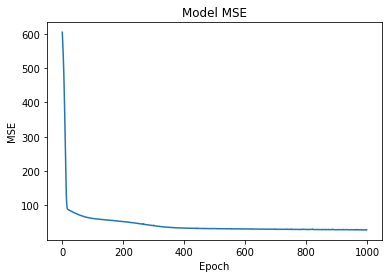

In [45]:
# Plot accuracy values.

plt.plot(history.history['mean_squared_error'])
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.show()

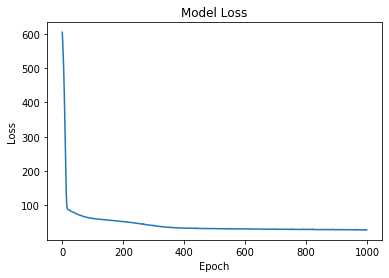

In [46]:
# Plot loss values.

plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

# Linear Regression

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [49]:
# Load the data.
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

# Normalize the data.
X_train = tensorflow.keras.utils.normalize(X_train, axis=1)
X_test = tensorflow.keras.utils.normalize(X_test, axis=1)

In [50]:
# Instantiate the model.
model = LinearRegression()

# Fit the model.
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
# Predict
y_pred = model.predict(X_test)

# Accuracy
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 18.16551049349648


## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [1]:
import tensorflow
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

In [3]:
# Load the data.

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
# Check the shape.

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [14]:
import numpy as np

np.unique(y_train)

# The number of classes in the target.

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [15]:
print(28*28)

784


In [16]:
# Reshape the data.

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [17]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [23]:
# Define hyperparameters.

batch_size = 32
num_classes = 10
epochs = 80

In [24]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [25]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [26]:
# Define a random seed.
np.random.seed(812)

# Instantiate the model.
model = Sequential()

# Input Layer
model.add(Dense(16, input_dim=784, kernel_initializer='normal', activation='relu'))

# Hidden Layer
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(16, activation='sigmoid'))

# Output Layer
model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))

# Compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_5 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_6 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                170       
Total params: 13,274
Trainable params: 13,274
Non-trainable params: 0
_________________________________________________________________


## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.